In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect("DCA.db")
titlefontsize=18
axislabelfontsize=15
axisnumberfontsize=13

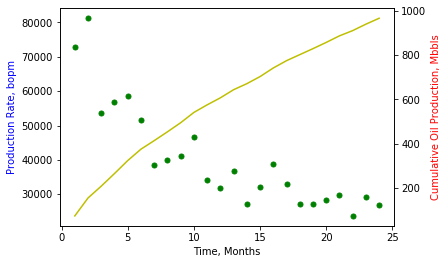

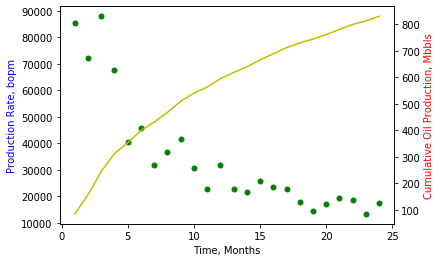

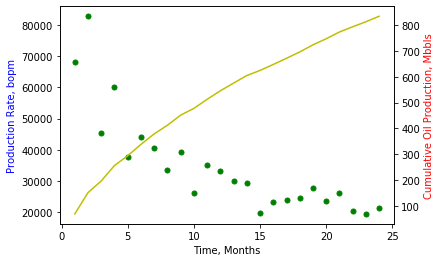

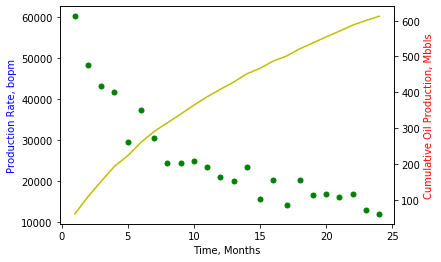

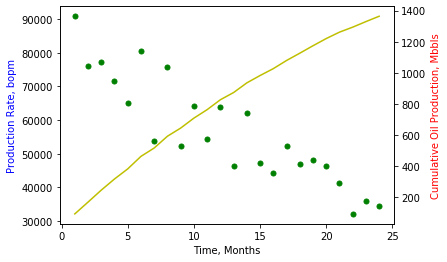

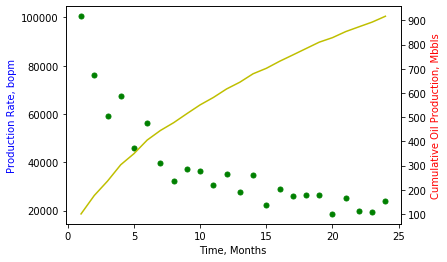

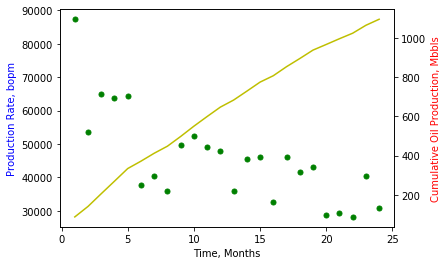

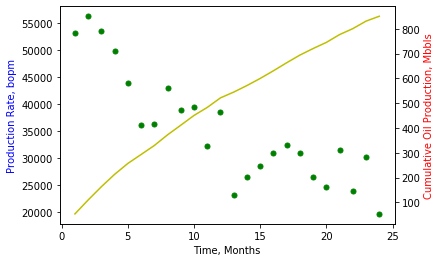

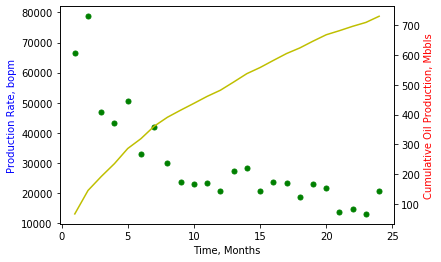

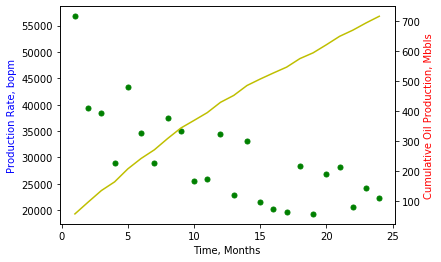

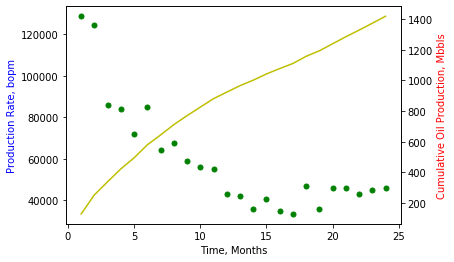

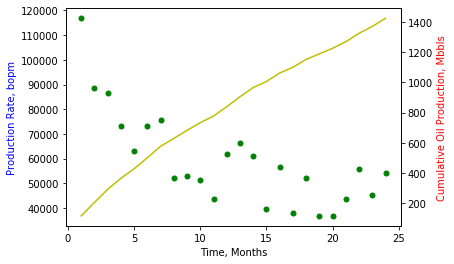

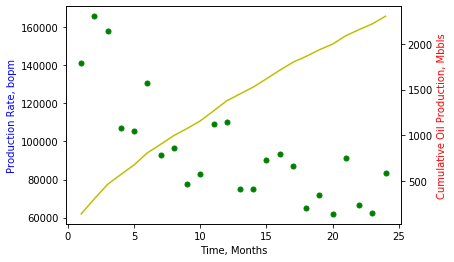

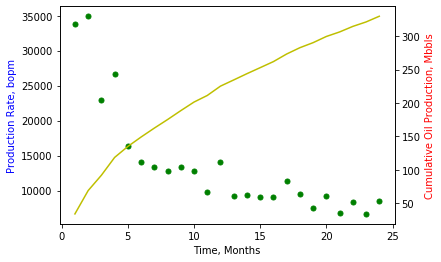

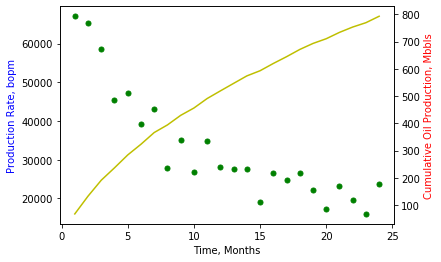

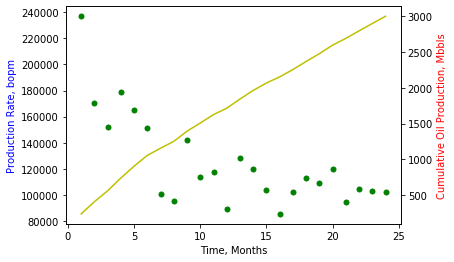

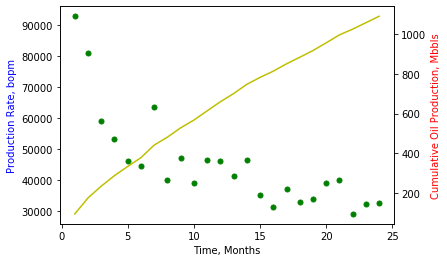

In [12]:
#Question 1
for wellID in range(1,18):
    prodDF = pd.read_sql_query(f"SELECT time,rate,Cum FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT * FROM DCAparams;", conn) #this will grab everything in DCAparams table  
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(prodDF['time'], prodDF['rate'], color="green", ls='None', marker='o', markersize=5,)
    ax2.plot(prodDF['time'], prodDF['Cum']/1000, 'y-')
    ax1.set_xlabel('Time, Months')
    ax1.set_ylabel('Production Rate, bopm', color='b')
    ax2.set_ylabel('Cumulative Oil Production, Mbbls', color='r')
    
    plt.show()


(24,)
['Well2', 'Well3', 'Well4', 'Well5', 'Well6', 'Well7', 'Well8', 'Well12', 'Well14', 'Well15', 'Well16', 'Well17']


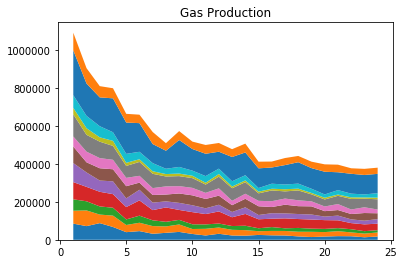

In [20]:
#Question 2 
for i in dcaDF['wellID']:
    
    prodDF['Well' + str(i)] = pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={i};", conn)
    

production = prodDF.iloc[:,1:].to_numpy()

time = prodDF['time'].to_numpy()
print(np.shape(time))

labels = prodDF.columns
labels = list(labels[1:])
print(labels)
fig, ax = plt.subplots()
ax.stackplot(time, np.transpose(production),labels=labels)
plt.title('Gas Production')
plt.show()



['Well2', 'Well3', 'Well4', 'Well5', 'Well6', 'Well7', 'Well8', 'Well12', 'Well14', 'Well15', 'Well16', 'Well17']


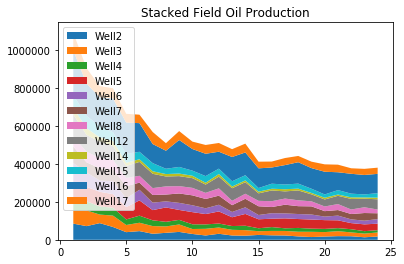

In [21]:
#question 3
for wellID in range(1,18):
    
    prodDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT wellID FROM DCAparams WHERE fluid='oil';", conn) #this will grab everything in DCAparams table  


j = 1
for i in dcaDF['wellID']:
    
    prodDF['Well' + str(i)] = pd.read_sql_query(f"SELECT rate FROM Rates WHERE wellID={i};", conn)
    
prodDF
production = prodDF.iloc[:,1:].to_numpy()

time = prodDF['time'].to_numpy()
#print(np.shape(time))

labels = prodDF.columns
labels = list(labels[1:])
print(labels)
fig, ax = plt.subplots()
ax.stackplot(time, np.transpose(production),labels=labels)
ax.legend(loc='upper left')
plt.title('Stacked Field Oil Production')
plt.show()

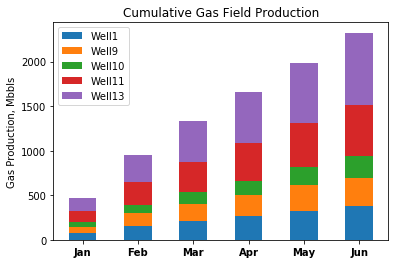

In [23]:
#Question #4
N = 6
ind = np.arange(1,N+1) 
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
labels=[]
loc_plts = []
width = 0.5
for wellID in range(1,18):
    cumDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT wellID FROM DCAparams WHERE fluid='gas';", conn) #this will grab everything in DCAparams table  
    
for i in dcaDF['wellID']:
    
    cumDF['Well' + str(i)] = pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID={i};", conn)
j = 1
for i in dcaDF['wellID']:
   p1 = plt.bar(cumDF['time'][0:N], cumDF['Well' + str(i)][0:N]/1000,width, bottom = result)
   labels.append('Well' + str(i))
   loc_plts.append(p1)
   plt.ylabel('Gas Production, Mbbls')
   plt.title('Cumulative Gas Production')
   plt.xticks(ind, months, fontweight='bold')
   j +=1
   split = cumDF.iloc[0:6,1:j].to_numpy() 
   result = np.sum(a=split,axis=1)/1000
plt.legend(loc_plts,labels)   
plt.show(loc_plts)

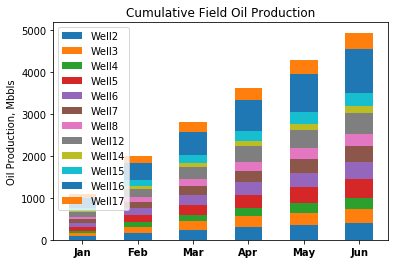

<Figure size 3600x2000 with 0 Axes>

In [24]:
#Question 5 
N = 6
ind = np.arange(1,N+1) 
months = ['Jan','Feb','Mar','Apr','May','Jun']
result = np.zeros(len(months))
labels=[]
loc_plts = []
width = 0.5
for wellID in range(1,18):
    cumDF = pd.read_sql_query(f"SELECT time FROM Rates WHERE wellID={wellID};", conn)    
    dcaDF = pd.read_sql_query("SELECT wellID FROM DCAparams WHERE fluid='oil';", conn) #this will grab everything in DCAparams table  
for i in dcaDF['wellID']:
    cumDF['Well' + str(i)] = pd.read_sql_query(f"SELECT Cum FROM Rates WHERE wellID={i};", conn)
j = 1
for i in dcaDF['wellID']:
   p1 = plt.bar(cumDF['time'][0:N], cumDF['Well' + str(i)][0:N]/1000,width, bottom = result)
   labels.append('Well' + str(i))
   loc_plts.append(p1)
   plt.ylabel('Oil Production, Mbbls')
   plt.title('Cumulative Field Oil Production')
   plt.xticks(ind, months, fontweight='bold')
   j +=1
   split = cumDF.iloc[0:6,1:j].to_numpy() 
   result = np.sum(a=split,axis=1)/1000
plt.legend(loc_plts,labels)  
loc_plts = plt.figure(figsize=(36,20),dpi=100)


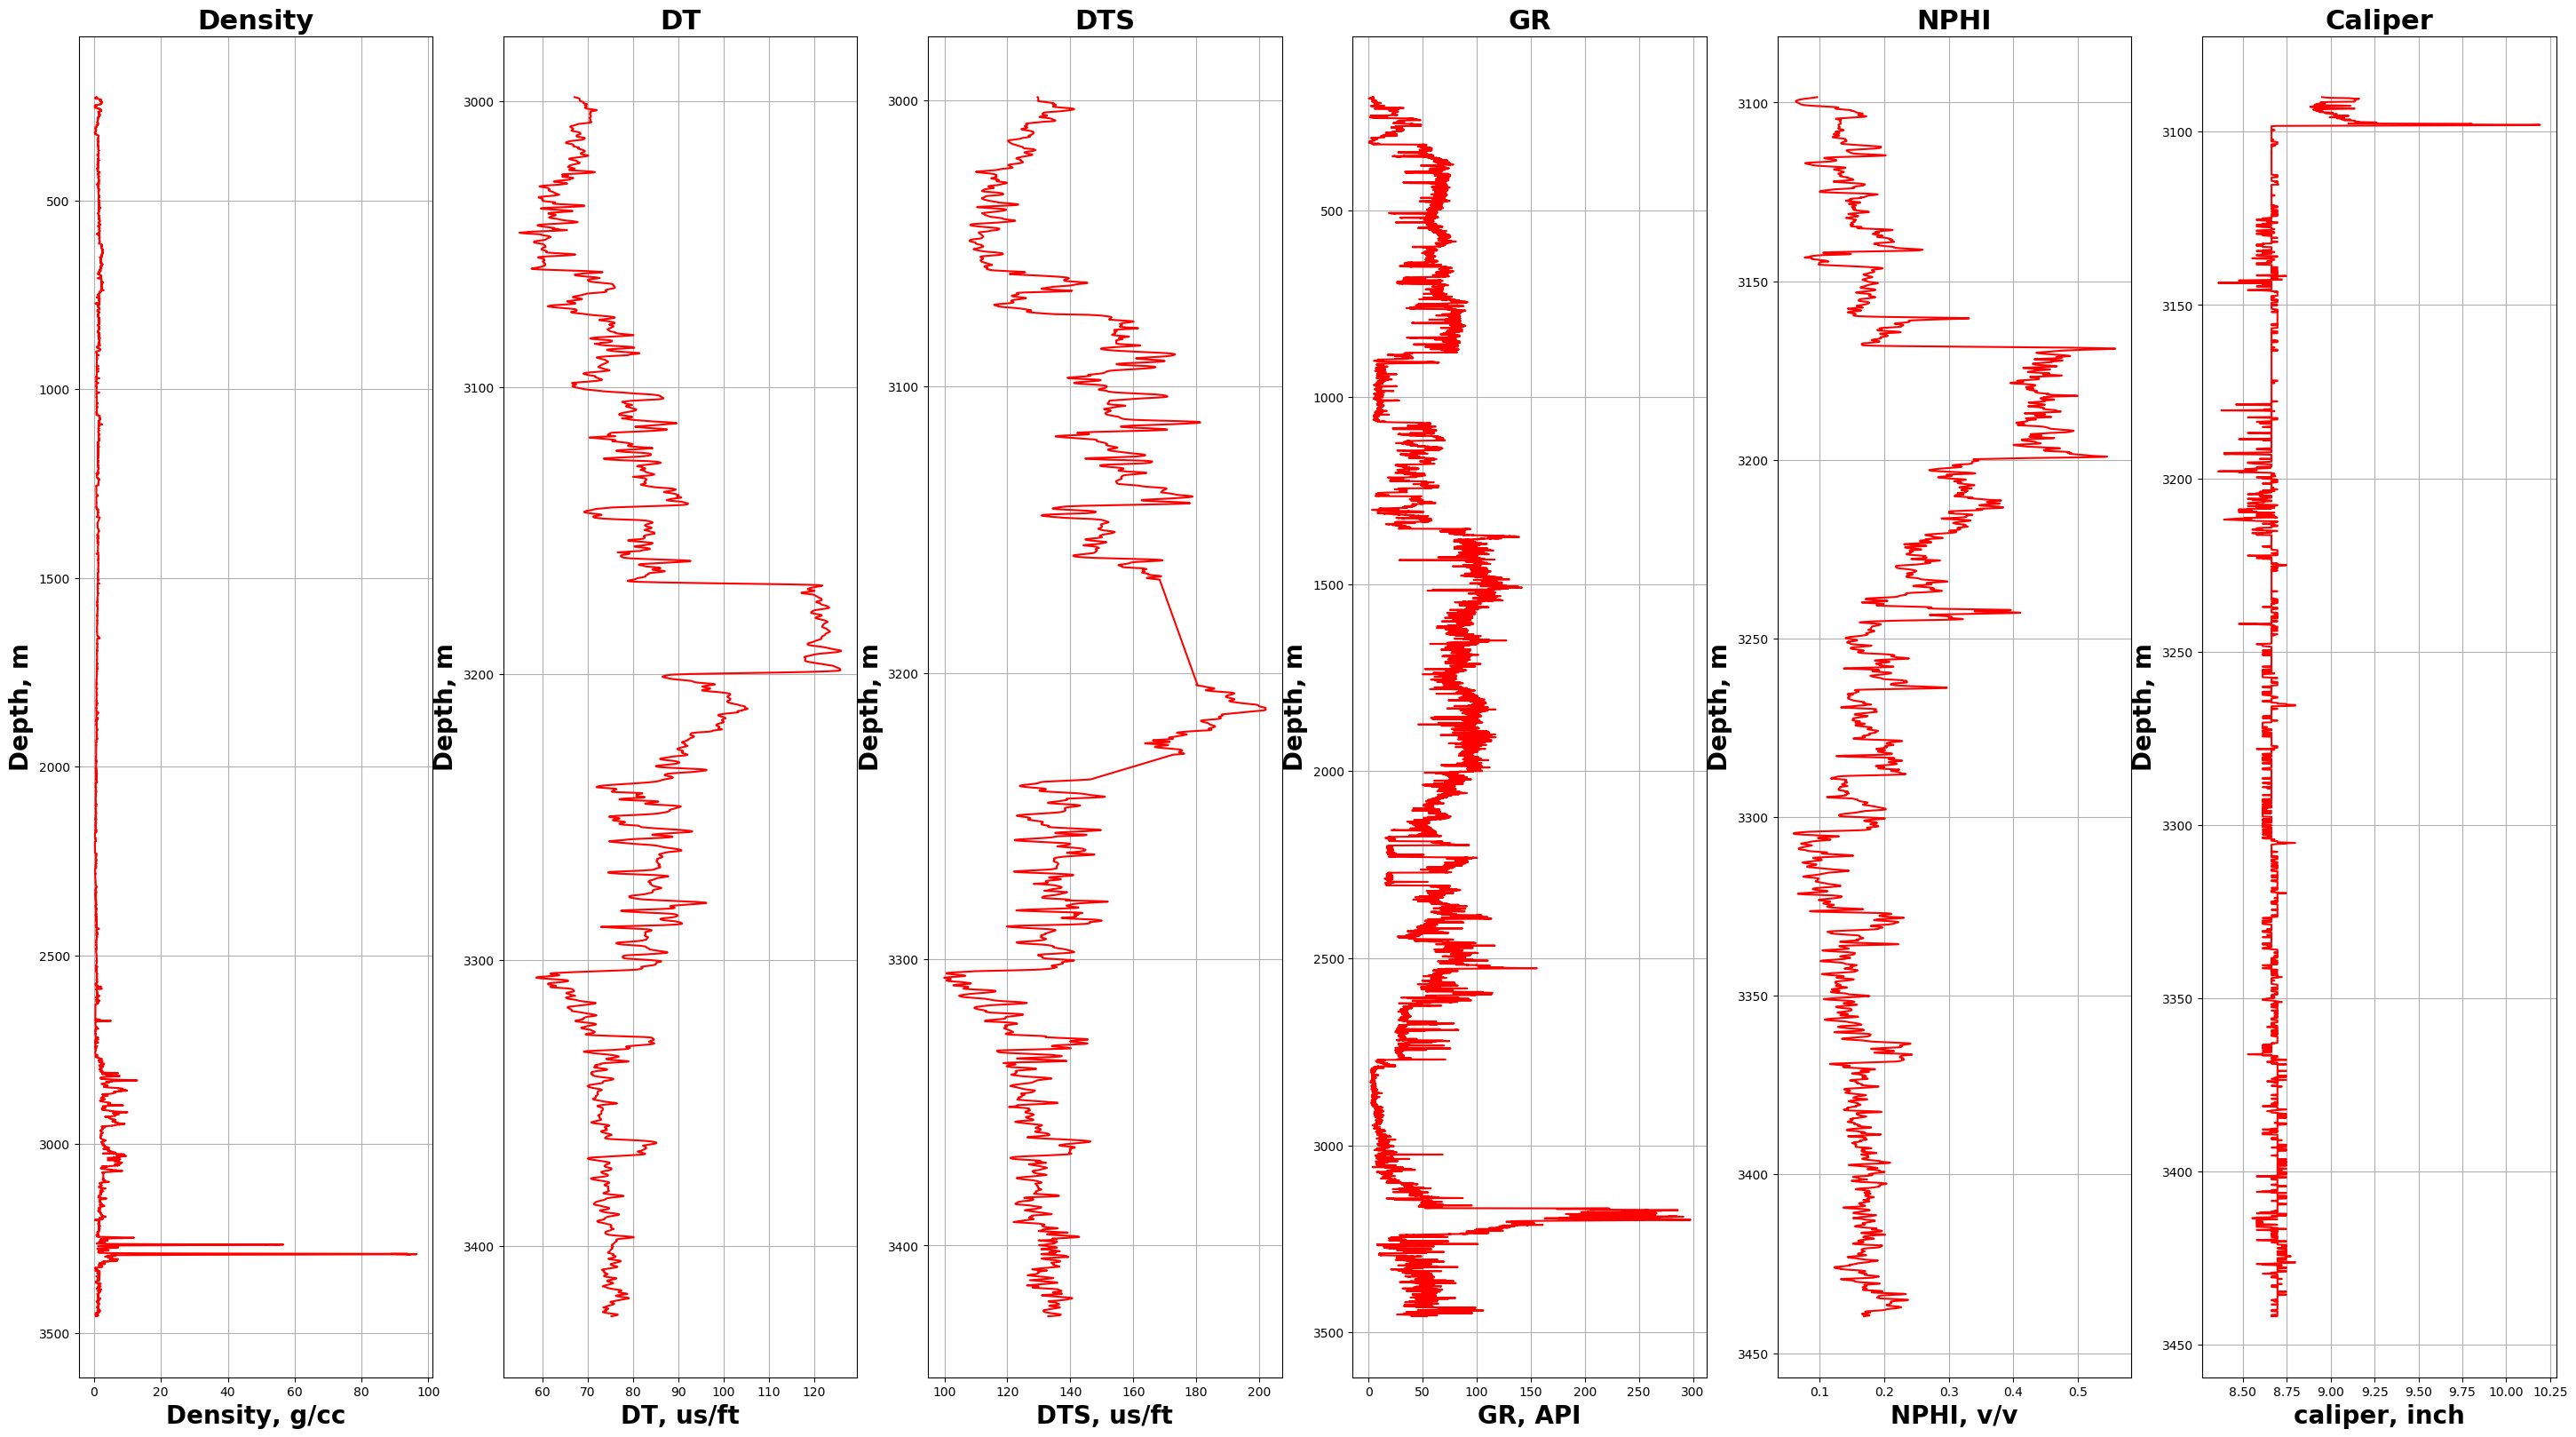

In [30]:
#well 15_9-F-4
data1 = np.loadtxt("15_9-F-1B_INPUT.LAS",skiprows=69)
DZ1,rho1=data1[:,0], data1[:,16]
DZ1=DZ1[np.where(rho1>0)]
rho1=rho1[np.where(rho1>0)]


titleFontSize = 22
fontSize = 20
#Plotting multiple well log tracks on one graph
fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='red')
plt.title('Density', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
     
DZ1,DT1 =data1[:,0], data1[:,8]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='red')
plt.title('DT', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DTS1 =data1[:,0], data1[:,9]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='red')
plt.title('DTS', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,GR1 =data1[:,0], data1[:,10]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='red')
plt.title('GR', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,NPHI1 =data1[:,0], data1[:,12]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='red')
plt.title('NPHI', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()


DZ1,CALI1 =data1[:,0], data1[:,6]
DZ1=DZ1[np.where(CALI1>0)]
CALI1=CALI1[np.where(CALI1>0)]

plt.subplot(1, 6, 6)
plt.grid(axis='both')
plt.plot(CALI1,DZ1, color='red')
plt.title('Caliper', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('caliper, inch', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

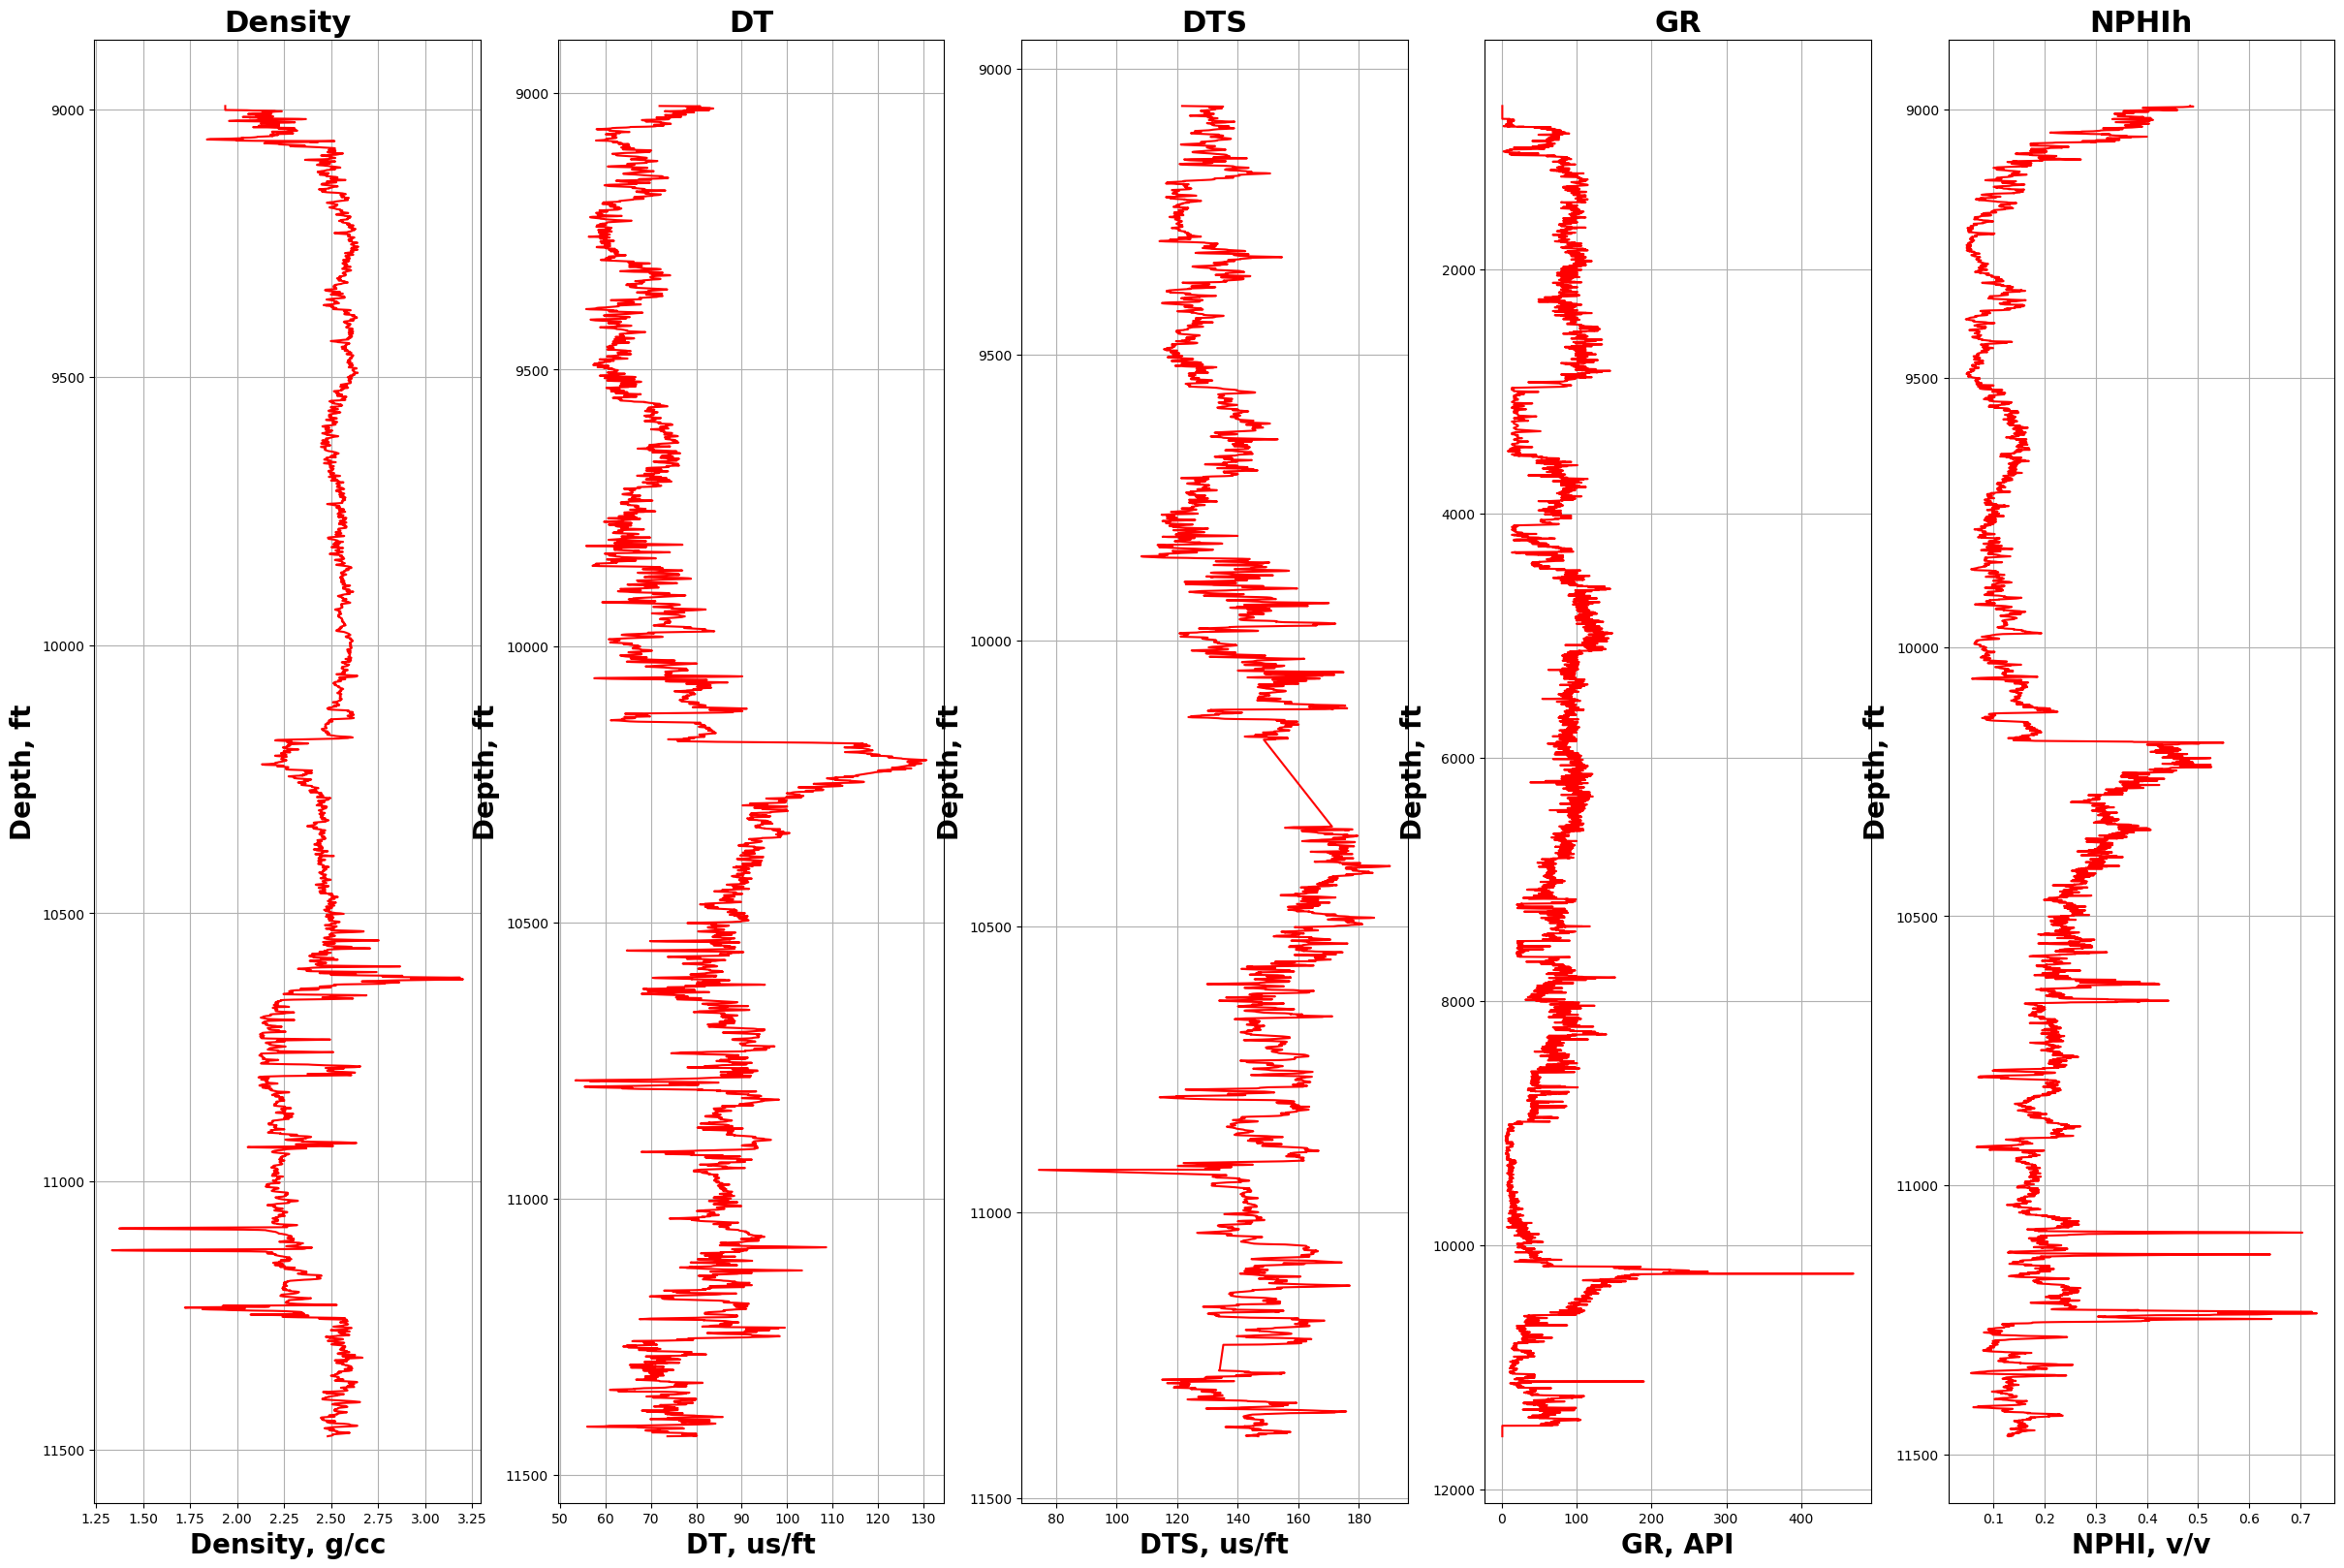

In [29]:
#   Well 15_9-F-4
data2 = np.loadtxt("15_9-F-4_INPUT.LAS",skiprows=65)
DZ2,rho2=data2[:,0], data2[:,7]
DZ2=DZ2[np.where(rho2>0)]
rho2=rho2[np.where(rho2>0)]


titleFontSize = 22
fontSize = 20


fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho2,DZ2, color='red')
plt.title('Density', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
     
DZ2,DT2 =data2[:,0], data2[:,2]
DZ2=DZ2[np.where(DT2>0)]
DT2=DT2[np.where(DT2>0)]

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(DT2,DZ2, color='red')
plt.title('DT', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ2,DTS2 =data2[:,0], data2[:,3]
DZ2=DZ2[np.where(DTS2>0)]
DTS2=DTS2[np.where(DTS2>0)]

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(DTS2,DZ2, color='red')
plt.title('DTS', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ2,GR2 =data2[:,0], data2[:,4]
DZ2=DZ2[np.where(GR2>0)]
GR2=GR2[np.where(GR2>0)]

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(GR2,DZ2, color='red')
plt.title('GR', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ2,NPHI2 =data2[:,0], data2[:,5]
DZ2=DZ2[np.where(NPHI2>0)]
NPHI2=NPHI2[np.where(NPHI2>0)]

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(NPHI2,DZ2, color='red')
plt.title('NPHIh', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

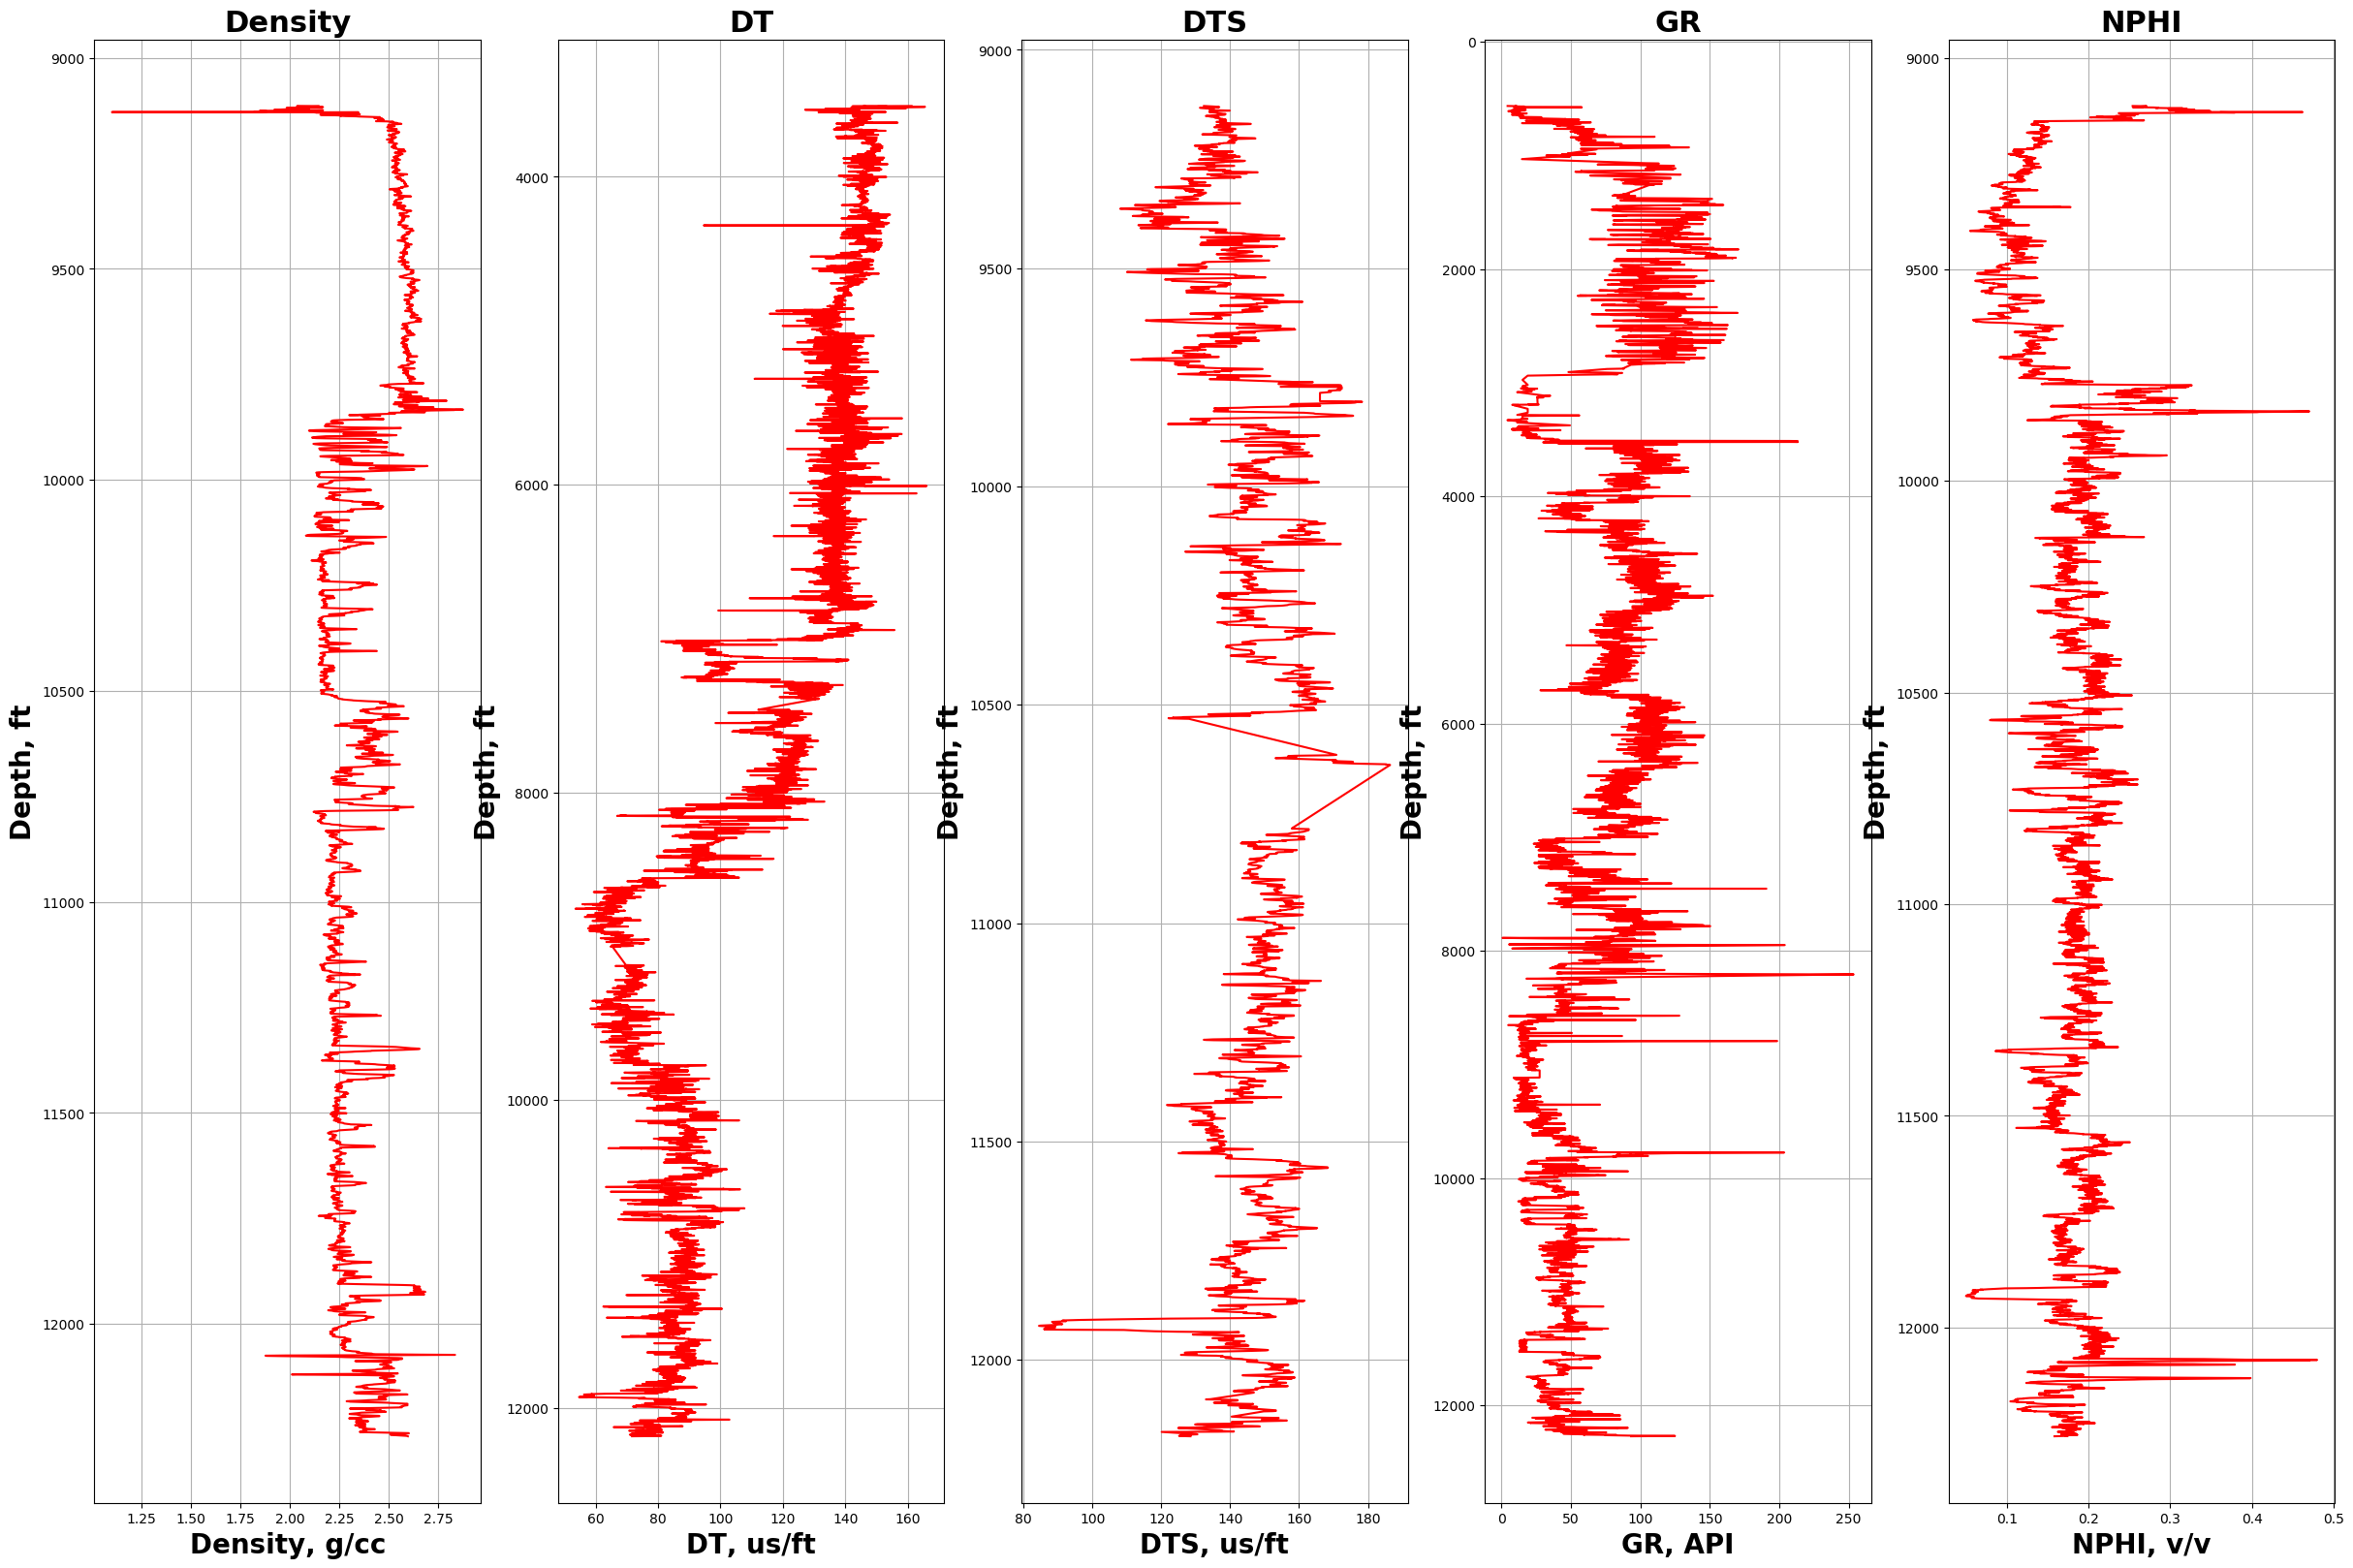

In [34]:
data3 = np.loadtxt("15_9-F-14_INPUT.LAS",skiprows=69)
DZ3,rho3=data3[:,0], data3[:,9]
DZ3=DZ3[np.where(rho3>0)]
rho3=rho3[np.where(rho3>0)]


titleFontSize = 22
fontSize = 20
fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 6, 1)
plt.grid(axis='both')
plt.plot(rho3,DZ3, color='red')
plt.title('Density', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()
     
DZ3,DT3 =data3[:,0], data3[:,3]
DZ3=DZ3[np.where(DT3>0)]
DT3=DT3[np.where(DT3>0)]

plt.subplot(1, 6, 2)
plt.grid(axis='both')
plt.plot(DT3,DZ3, color='red')
plt.title('DT', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ3,DTS3 =data3[:,0], data3[:,4]
DZ3=DZ3[np.where(DTS3>0)]
DTS3=DTS3[np.where(DTS3>0)]

plt.subplot(1, 6, 3)
plt.grid(axis='both')
plt.plot(DTS3,DZ3, color='red')
plt.title('DTS', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ3,GR3 =data3[:,0], data3[:,5]
DZ3=DZ3[np.where(GR3>0)]
GR3=GR3[np.where(GR3>0)]

plt.subplot(1, 6, 4)
plt.grid(axis='both')
plt.plot(GR3,DZ3, color='red')
plt.title('GR', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ3,NPHI3 =data3[:,0], data3[:,6]
DZ3=DZ3[np.where(NPHI3>0)]
NPHI3=NPHI3[np.where(NPHI3>0)]

plt.subplot(1, 6, 5)
plt.grid(axis='both')
plt.plot(NPHI3,DZ3, color='red')
plt.title('NPHI', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, ft', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()